# CROP PRODUCTION PREDICTION

### 1. POSTER

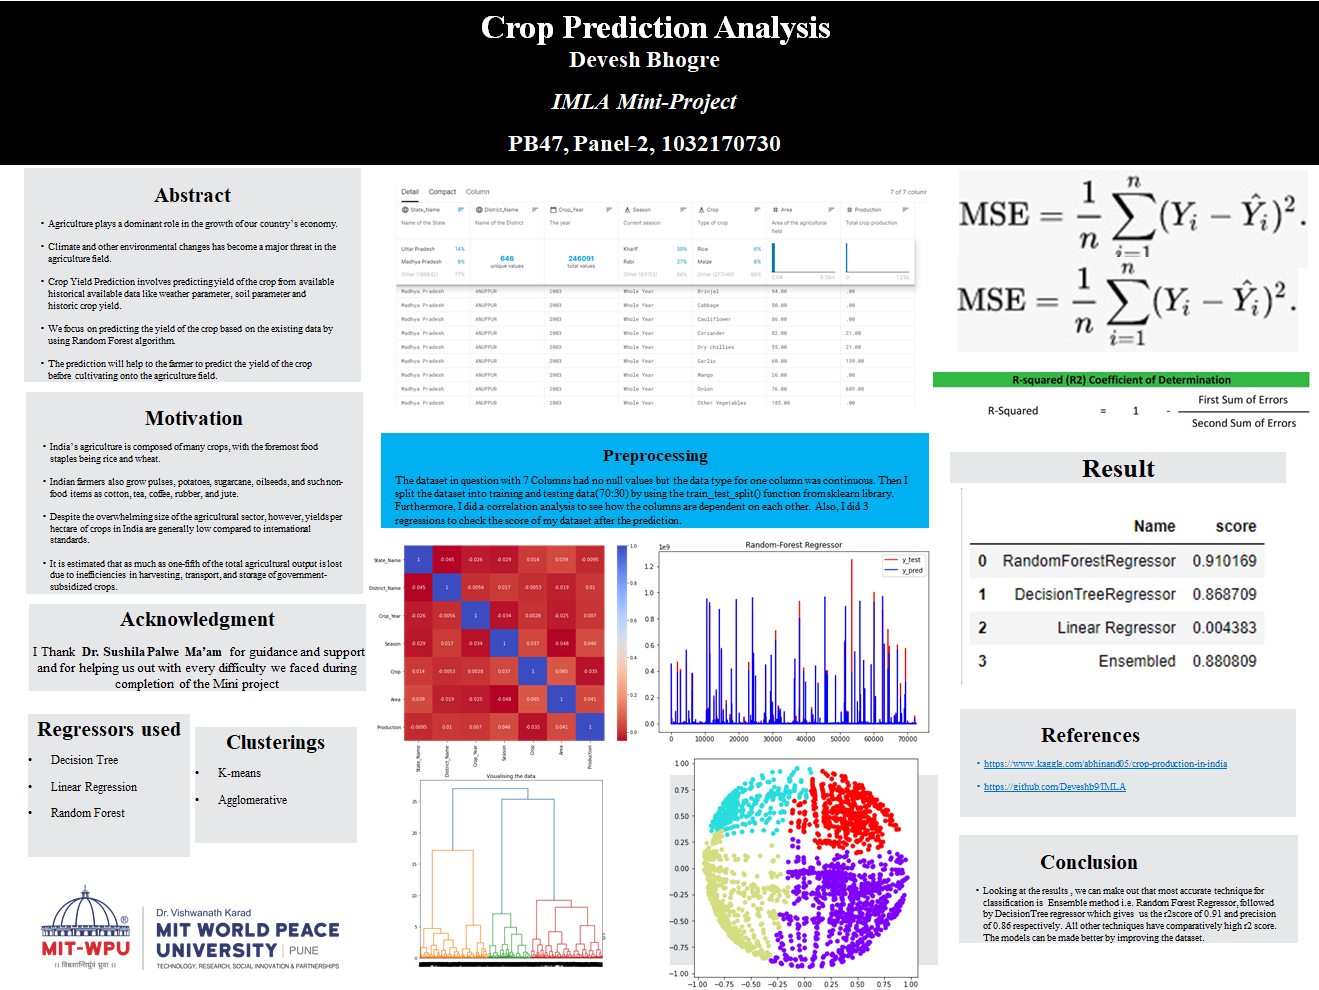

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\Devesh Bhogre\Desktop\Programs\Python\classes\IMLA\Mini-Project\PB47_Poster_IMLA.png')

### 2. Load the Dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1 = pd.read_csv("C:\\Users\\Devesh Bhogre\\Desktop\\Programs\\Python\\classes\\IMLA\\Mini-Project\\crop_production.csv")

In [4]:
df1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


### 3. Cleaning the Data 

In [5]:
df1 = df1.dropna()
df1 = df1.drop_duplicates()
df1[df1['Production'].isna()]
df = df1
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [6]:
print(df['State_Name'].nunique())
print(df['District_Name'].nunique())
print(df['Season'].nunique())
print(df['Crop'].nunique())

33
646
6
124


### 4. LabelEncoding the Data 

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_re = df.sample(10)

In [8]:
lel = preprocessing.LabelEncoder()
lel.fit(df_re['State_Name'])
le_state_mapping = dict(zip(lel.classes_, lel.transform(lel.classes_)))
print(le_state_mapping)
lel.fit(df_re['District_Name'])
le_district_mapping = dict(zip(lel.classes_, lel.transform(lel.classes_)))
print(le_district_mapping)
lel.fit(df_re['Season'])
le_season_mapping = dict(zip(lel.classes_, lel.transform(lel.classes_)))
print(le_season_mapping)
lel.fit(df_re['Crop'])
le_crop_mapping = dict(zip(lel.classes_, lel.transform(lel.classes_)))
print(le_crop_mapping)

{'Andhra Pradesh': 0, 'Chhattisgarh': 1, 'Karnataka': 2, 'Madhya Pradesh': 3, 'Odisha': 4, 'Punjab': 5, 'Rajasthan': 6, 'Uttar Pradesh': 7, 'West Bengal': 8}
{'ANANTAPUR': 0, 'ASHOKNAGAR': 1, 'CHIKBALLAPUR': 2, 'CHITRAKOOT': 3, 'COOCHBEHAR': 4, 'DANTEWADA': 5, 'KORAPUT': 6, 'PALI': 7, 'PATIALA': 8, 'RAE BARELI': 9}
{'Kharif     ': 0, 'Rabi       ': 1, 'Summer     ': 2, 'Whole Year ': 3, 'Winter     ': 4}
{'Citrus Fruit': 0, 'Dry chillies': 1, 'Dry ginger': 2, 'Groundnut': 3, 'Horse-gram': 4, 'Jowar': 5, 'Masoor': 6, 'Moong(Green Gram)': 7, 'Rice': 8}


In [9]:
df['State_Name'] = le.fit_transform(df['State_Name'])
df['District_Name'] = le.fit_transform(df['District_Name'])
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])
df['Production'] = df['Production'].astype(int)
df['Area'] = df['Area'].astype(int)
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,427,2000,1,2,1254,2000
1,0,427,2000,1,74,2,1
2,0,427,2000,1,95,102,321
3,0,427,2000,4,7,176,641
4,0,427,2000,4,22,720,165
...,...,...,...,...,...,...,...
246086,32,471,2014,3,95,306,801
246087,32,471,2014,3,102,627,463
246088,32,471,2014,4,106,324,16250
246089,32,471,2014,5,95,279151,597899


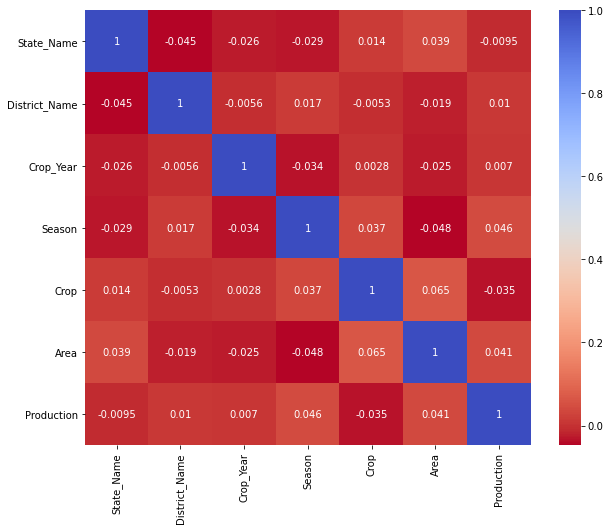

In [10]:
#heatmap to check corelation between features
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(1, 1, figsize=(10, 8))
corr_succ = df.corr()
sns.heatmap(corr_succ, cmap="coolwarm_r", annot=True, ax=ax)
ax.set_ylim(len(df.columns), 0)
plt.show()

### 5. Train-spliting the Data into 70-30 train-test

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,6]

In [12]:
print("X :", X.shape)
print("y :", y.shape)

X : (242361, 6)
y : (242361,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

X_train : (169652, 6)
X_test  : (72709, 6)
y_train : (169652,)
y_test  : (72709,)


In [14]:
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [15]:
df['Production'].nunique()

46570

### 6. Applying Various Regressors 

#### 6.1. Random Forest Regressor 

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
cv_k = 5
cv_scoring = 'r2'
from sklearn.model_selection import KFold
kf = KFold(n_splits=cv_k, shuffle=True)
import time
now = time.time()
est_best = RandomForestRegressor(n_estimators = 10, n_jobs=-1)
est_best.fit(X_train, y_train)
scores = cross_val_score(est_best, X_train, y_train, cv=kf, scoring=cv_scoring)
print("Accuracy: %0.4f (+/- %0.4f)"% (scores.mean(),scores.std()*2))
after = time.time()
print("time: {:5.2f} s".format(after-now))
y_pred = est_best.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
score = r2_score(y_test,y_pred)
print("Score: ",score)

Accuracy: 0.8891 (+/- 0.1240)
time: 26.12 s
23152747119067.84
4811730.158588264
Score:  0.9101691165378829


In [17]:
#for comparing all scores we will create new dataFrame
df_score = pd.DataFrame({"Name":["RandomForestRegressor"],
                         "score": [score]}) 

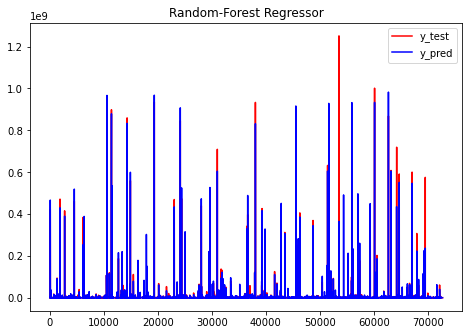

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Random-Forest Regressor')
plt.plot(y_test.values,color='red')
plt.plot(y_pred,color='blue')
ax.legend(labels=['y_test', 'y_pred'])

#### 6.2. Decision-Tree Regressor 

In [19]:
from sklearn.tree import DecisionTreeRegressor
drm=DecisionTreeRegressor()
drm.fit(X_train,y_train)
y_pred=drm.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2 = r2_score(y_test, y_pred)
print("Score: ",r2)

33838571196182.285
5817093.019385395
Score:  0.868708938511


In [20]:
df_score_temp = pd.DataFrame({"Name":["DecisionTreeRegressor"],
                         "score": [r2]})
df_score = df_score.append(df_score_temp, ignore_index = True)

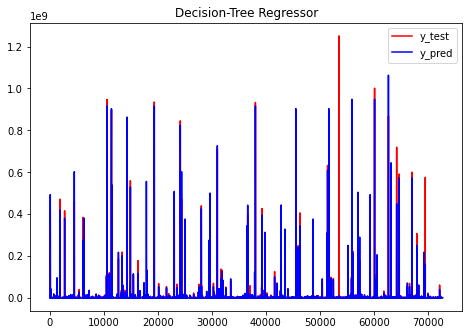

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Decision-Tree Regressor')
plt.plot(y_test.values,color='red')
plt.plot(y_pred,color='blue')
ax.legend(labels=['y_test', 'y_pred'])

#### 6.3. K-Linear Regressor 

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(rmse)
print("Score:",r2)

256607375014344.22
16018969.224464606
Score: 0.004383061677848188


In [23]:
df_score_temp = pd.DataFrame({"Name":["Linear Regressor"],
                         "score": [r2]})
df_score = df_score.append(df_score_temp, ignore_index = True)

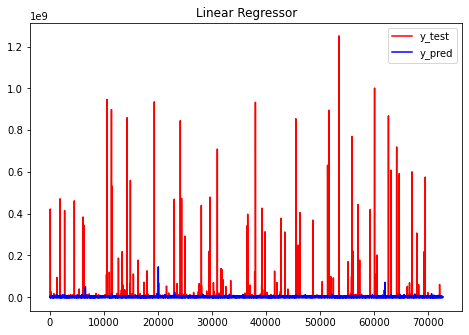

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Linear Regressor')
plt.plot(y_test.values,color='red')
plt.plot(y_pred,color='blue')
ax.legend(labels=['y_test', 'y_pred'])

### 7. Ensemble

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = DecisionTreeRegressor()
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
ereg = VotingRegressor(estimators=[('dt', reg1), ('rf', reg2)])
ereg = ereg.fit(X_train,y_train)

In [26]:
y_pred = ereg.predict(X_test)
mse=mean_squared_error(y_pred,y_test)
print("Ensemble MSE  :",mse)
rmse=np.sqrt(mse)
print("Ensemble RMSE :",rmse)
r2 = r2_score(y_test, y_pred)
print("Ensemble Score: ",r2)

Ensemble MSE  : 30719865724108.45
Ensemble RMSE : 5542550.471047463
Ensemble Score:  0.8808092765993387


In [27]:
df_score_temp = pd.DataFrame({"Name":["Ensembled"],
                         "score": [r2]})
df_score = df_score.append(df_score_temp, ignore_index = True)

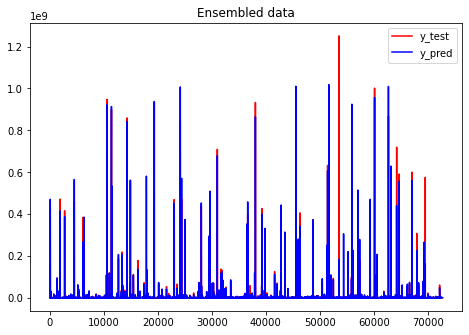

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Ensembled data')
plt.plot(y_test.values,color='red')
plt.plot(y_pred,color='blue')
ax.legend(labels=['y_test', 'y_pred'])

### 8. Comparing scores of different Regressor

In [29]:
df_score

,Name,score
0,RandomForestRegressor,0.910169
1,DecisionTreeRegressor,0.868709
2,Linear Regressor,0.004383
3,Ensembled,0.880809


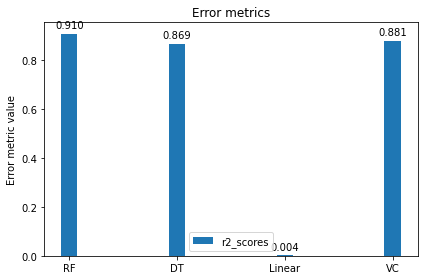

In [30]:
labels = ['RF','DT','Linear','VC']
r2_scores = df_score['score']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x, r2_scores, width, label='r2_scores')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Error metric value')
ax.set_title('Error metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects2)
fig.tight_layout()
plt.show()

### 9. Clustering  

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

In [32]:
x=df.head(2000)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)

In [33]:
#reduce the features two two features using PCA
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2']

#### 9.1. Dendogram 

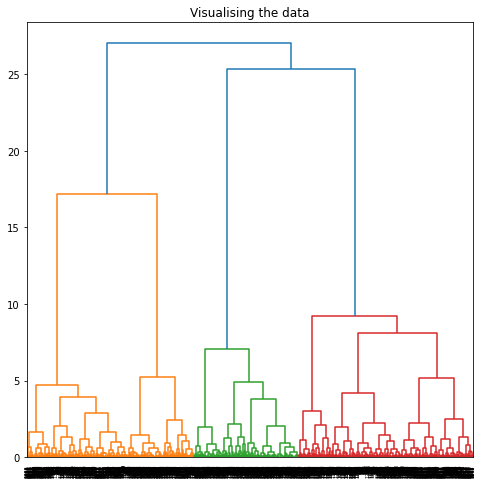

In [34]:
plt.figure(figsize = (8,8))
plt.title('Visualising the data')
dendrogram = shc.dendrogram((shc.linkage(x_principal, method='ward')))

#### 9.2. Agglomerative

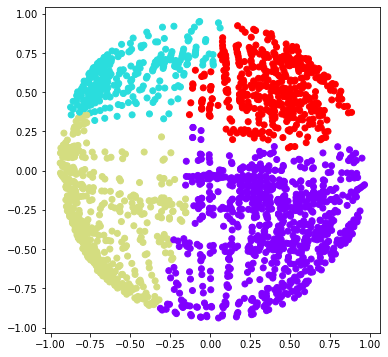

In [35]:
ac2 = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean', linkage='ward')
ac2.fit(x_principal)
labels = ac2.labels_
plt.figure(figsize=(6,6))
plt.scatter(x_principal['P1'], x_principal['P2'],
            c=ac2.fit_predict(x_principal), cmap='rainbow'
            )

#### 9.3. K-means 

[[-0.60798443 -0.41005264]
 [ 0.35909548  0.5120496 ]
 [-0.59314304  0.50742096]
 [ 0.41656114 -0.33981946]]


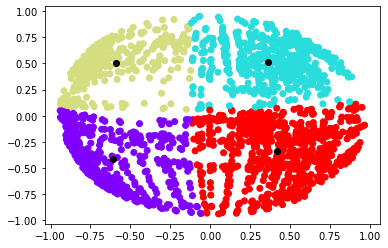

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_principal)
print(kmeans.cluster_centers_)
plt.scatter(x_principal['P1'], x_principal['P2'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')